<a href="https://colab.research.google.com/github/leandro095/Analisi-Dati-Storici-Ferrovie-/blob/main/Grafico_Comparativo_km_Ferrovie_secondarie_Italia_Spagna_1855_1900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creazione di grafici a linee comparativi relativi all'evoluzione delle ferrovie secondarie (in KM) in Italia e Spagna tra 1855-1900 e 1901-1914**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/TESI_DOTTORATO/Grafici_tesi')  # "Il mio Drive"
!pwd # path corrente
!ls  # vedi cartelle

/content/drive/MyDrive/Colab Notebooks/TESI_DOTTORATO/Grafici_tesi
Italia_km_1855-1900.xlsx  Spagna_km_1871-1900.xlsx
Italia_km_1900-1914.xlsx  Spagna_km_1900-1914.xlsx


# Comparazione 1855-1900

In [ ]:
# Leggo dal mio drive la tabella italiana e individuo le colonne che mi servono
tab_italia = pd.read_excel('Italia_km_1855-1900.xlsx')
tab_italia.head(50)

,Anni,Scartamento normale grandi compagnie,Scartamento ridotto grandi compagnie,Totale grandi compagnie,Scartamento normale società locali,Scartamento ridotto società locali,Totale società locali,Totale Scartamento normale,Totale Scartamento ridotto,Totale generale
0,1855,1207,-,1207,-,-,-,1207,-,1207
1,1856,1330,-,1330,30,-,30,1360,-,1360
2,1857,1550,-,1550,30,-,30,1580,-,1580
3,1858,1747,-,1747,30,-,30,1777,-,1777
4,1859,2206,-,2206,30,-,30,2236,-,2236
5,1860,2374,-,2374,30,-,30,2404,-,2404
6,1861,2743,-,2743,30,-,30,2773,-,2773
7,1862,3079,-,3079,30,-,30,3109,-,3109
8,1863,3695,-,3695,30,-,30,3725,-,3725
9,1864,4132,-,4132,30,-,30,4162,-,4162


In [ ]:
# stessa cosa per la Spagna, in più imposto diversamente il nome dell'ultima colonna per non confonderle
spagna_pre1900 = pd.read_excel('Spagna_km_1871-1900.xlsx', sheet_name=0)

spagna_pre1900.head(50)

,Anni,Vía Ancha,Totale,Vía Estrecha,Totale.1
0,1855,142,440,/,/
1,1856,48,489,2,2
2,1857,146,635,3,5
3,1858,182,817,/,5
4,1859,298,1115,/,5
5,1860,764,1880,/,5
6,1861,456,2336,17,22
7,1862,359,2695,18,40
8,1863,827,3522,12,52
9,1864,469,3991,12,64


In [ ]:
# Tengo solo le colonne che mi servono per l'analisi
italia_societa_locali = tab_italia[['Anni', 'Totale società locali']].copy()
italia_societa_locali['Totale società locali'] = pd.to_numeric(italia_societa_locali['Totale società locali'], errors='coerce')
italia_societa_locali.head()

,Anni,Totale società locali
0,1855,NaN
1,1856,30.0
2,1857,30.0
3,1858,30.0
4,1859,30.0


In [ ]:
# Tengo solo le colonne che mi servono per l'analisi
spagna_totale_ferrovie = spagna_pre1900[['Anni', 'Totale.1']].copy()
spagna_totale_ferrovie['Totale.1'] = pd.to_numeric(spagna_totale_ferrovie['Totale.1'], errors='coerce')
spagna_totale_ferrovie.head()

,Anni,Totale.1
0,1855,NaN
1,1856,2.0
2,1857,5.0
3,1858,5.0
4,1859,5.0


## Creazione Grafico a Linee Comparativo

Genero un grafico a linee che confronta l'evoluzione delle ferrovie per 'Totale società locali' in Italia e 'Totale.1' in Spagna. Utilizzo 'Anni' sull'asse x e aggiungo un titolo, etichetto per gli assi e una legenda per distinguere le due serie di dati.


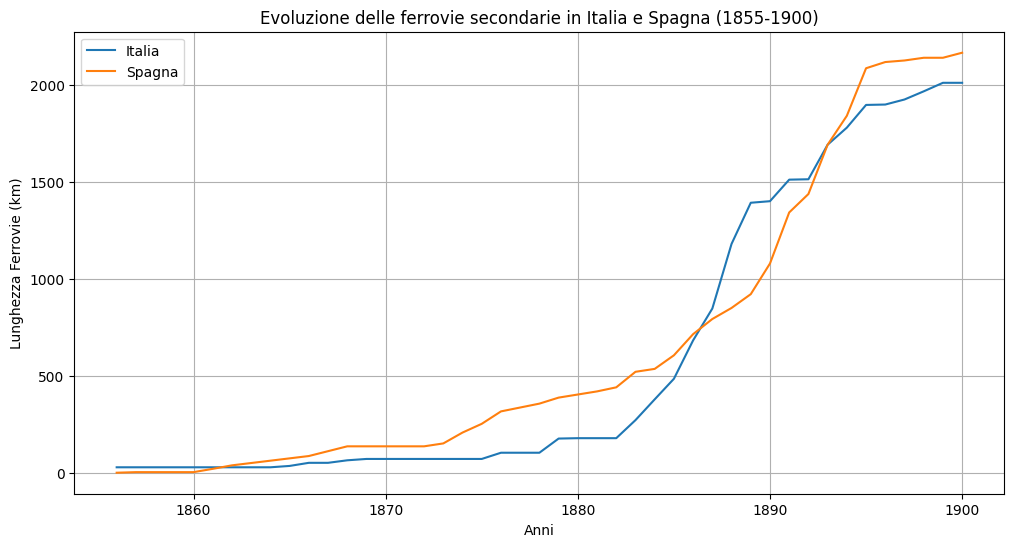

In [ ]:
# Grafico a linee per comparazione
plt.figure(figsize=(12, 6))
plt.plot(italia_societa_locali['Anni'], italia_societa_locali['Totale società locali'], label='Italia')
plt.plot(spagna_totale_ferrovie['Anni'], spagna_totale_ferrovie['Totale.1'], label='Spagna')

plt.title('Evoluzione delle ferrovie secondarie in Italia e Spagna (1855-1900)')
plt.xlabel('Anni')
plt.ylabel('Lunghezza Ferrovie (km)')
plt.legend()
plt.grid(True)
plt.show()


Come si può vedere, negli anni precedenti al 1870 non vi fu una forte crescita dei km di ferrovie secondarie costruiti nei due paesi.

Tuttavia dalla metà degli anni '60 dell'Ottocento si assistette ad una crescita maggiore in Spagna rispetto all'Italia, data dall'impostazione speculativa che aveva assunto la politica ferroviaria spagnola di questi anni: si privilegiava la concessione di nuove linee per attrarre investimenti e favorire profitti immediati, trasferendo allo Stato tutti i rischi finanziari. Questa strategia, simile a quella adottata in Italia ma più marcata nella sua componente clientelare, condusse a una vera e propria “bolla ferroviaria”, la cui esplosione determinò il rallentamento quasi totale delle costruzioni almeno fino alla metà degli anni '70. Fu dal 1877 in poi, con la Ley General de Ferrocarriles, che si assistette ad un nuovo incremento, seppur limitato, dei km delle linee secondarie. Come si vede, tuttavia, dalla metà degli anni '90 dell'Ottencento si tornò in una situazione di stagnazione.

Il caso italiano presenta invece delle differenze importanti. La crescita di queste linee rimase infatti inferiore alla Spagna almeno fino alla metà degli anni '80, quando cominciarono a farsi sentire con forza gli effetti della nuova Legge Baccarini del 1879 e delle sue modifiche successive. Negli anni '80 e primi anni '90, infatti, si assistette ad una crescita maggiore in Italia rispetto alla controparte, ma già verso la metà/fine anni '90 si può notare, anche in Italia, una stagnazioned ella crescita, con il chilometraggio che rimase inferiore a quello spagnolo dello stesso periodo.

# Comparazione 1901-1914

In [ ]:
# Leggo dal mio drive la tabella italiana e individuo le colonne che mi servono
tab_italia_1901_1914 = pd.read_excel('Italia_km_1900-1914.xlsx')
tab_italia_1901_1914.head(15)

,Anni,Totale società locali
0,1901,2033
1,1902,2091
2,1903,2152
3,1904,2234
4,1905,2296
5,1906,2354
6,1907,2510
7,1908,2581
8,1909,2684
9,1910,2769


In [17]:
# stessa cosa per la Spagna, in più imposto diversamente il nome dell'ultima colonna per non confonderle
spagna_post1900 = pd.read_excel('Spagna_km_1900-1914.xlsx', sheet_name=0)

spagna_post1900.head(10)

,Anni,Totale
0,1901,2226
1,1902,2300
2,1903,2425
3,1904,2531
4,1905,2728
5,1906,3094
6,1907,3103
7,1908,3204
8,1909,3233
9,1910,3332


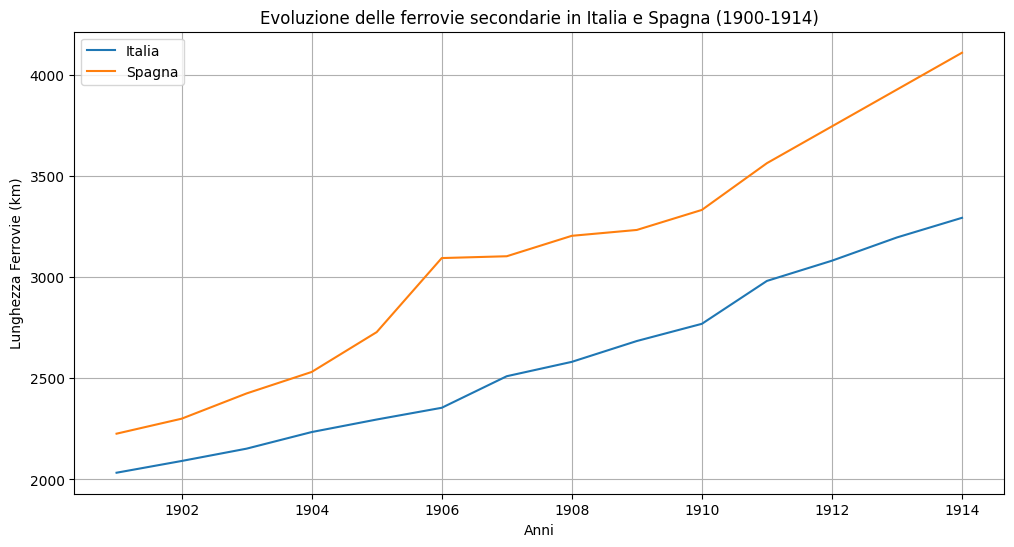

In [18]:
# Grafico comparativo a linee 1901-1914
plt.figure(figsize=(12, 6))
plt.plot(tab_italia_1901_1914['Anni'], tab_italia_1901_1914['Totale società locali'], label='Italia')
plt.plot(spagna_post1900['Anni'], spagna_post1900['Totale'], label='Spagna')

plt.title('Evoluzione delle ferrovie secondarie in Italia e Spagna (1900-1914)')
plt.xlabel('Anni')
plt.ylabel('Lunghezza Ferrovie (km)')
plt.legend()
plt.grid(True)
plt.show()

Come si vede nel grafico, i Km di ferrovie secondarie in entrambi i paesi aumentarono nei primi anni del Nuovo secolo fino al periodo precedente alla guerra mondiale.

In Italia la visione verso le secondarie cominciò a trasformarsi, e cominciarono ad essere percepite come un onere per i bilanci e per le grandi compagnie più che una risorsa per i territori. La mancanza di un quadro normativo organizzato, la disomogeneità dello sviluppo delle linee e la debolezza strutturale delle imprese concessionarie contribuirono a questa visione. Neanche la nascita dell'esercizio di Stato nel 1905 determinò un incremento della domanda ferroviaria. Nonostante ciò, i Km delle linee aumentarono comunque superando quota 3000Km nel 1911.

Per quanto relativo alla Spagna, nel primo Novecento si sentiva fortemente la necessità di un piano per lo sviluppo di queste infrastrutture secondarie. Gli incrementi più netti furono quelli conseguenti all'adozione dei nuovi piani ferroviari, come quello del 1904-1905. inoltre si può notare anche una certa stagnazione dei km proprio nei periodi precedenti rispetto ai piani del 1906 e 1910. Gli incrementi, tuttavia, risultarono inferiori rispetto alla domanda potenziale ma comunque superiori rispetto alla controparte italiana.